**Import the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Convert the dataset onto a pandas dataframe**

In [2]:
df = pd.read_csv('survey_results_public.csv')

**print the first five rows of the dataframe**

In [3]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


**provide some insight about your data**

In [4]:
df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


**reproduce the following**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

**We want to convert the age entries onto float/int by grabbing the first part of the sting. Hint( build a function called age_convert)** 

In [6]:
def age_convert(age_string):
    age_first_part = str(age_string).split('-')[0]
    return age_first_part

In [7]:
age_convert('25-30')

'25'

**Use lambda funtion to apply the age_convert funtion to the entire age column**

In [8]:
df['Age'] = df['Age'].apply(lambda age_object: str(age_object).split('-')[0]) 

**Note that the age type is still an object type. Convert it to numberic**

In [9]:
df['Age']= pd.to_numeric(df['Age'],errors='coerce')

In [10]:
df['Age'].dtypes

dtype('float64')

**Describe the dataframe after converting the age column to numeric one**

In [11]:
df.describe()

,ResponseId,CompTotal,Age,ConvertedCompYearly
count,83439.000000,4.718300e+04,76035.000000,4.684400e+04
mean,41720.000000,2.119407e+69,27.221201,1.184262e+05
std,24086.908893,4.603702e+71,8.881559,5.272944e+05
min,1.000000,0.000000e+00,18.000000,1.000000e+00
25%,20860.500000,1.600000e+04,18.000000,2.702500e+04
50%,41720.000000,6.700000e+04,25.000000,5.621100e+04
75%,62579.500000,1.400000e+05,35.000000,1.000000e+05
max,83439.000000,1.000000e+74,55.000000,4.524131e+07


In [12]:
df.head(1)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25.0,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0


**Drop the following columns: 'US_State','UK_Country' and'Age'**

In [13]:
df.drop(['US_State', 'UK_Country', 'Age'], axis=1)

,ResponseId,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,...,NEWOtherComms,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",...,No,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,...,No,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,...,Yes,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",...,No,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...",...,No,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,5,"Developer, back-end",...,No,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,2,"Developer, full-stack",...,No,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,4,Data scientist or machine learning specialist;...,...,No,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,3,"Developer, back-end",...,No,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

**Group your dataframe by country and check the number people in the U.S. responded to the survey**

In [15]:
#to see the all the rows of the value_counts()
pd.set_option("display.max_rows", None)

In [16]:
df['Country'].value_counts()

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Turkey                                                   1054
Switzerl

Q) What is the median salary of the developer in **<br>'United States of America',<br>
'United Kingdom of Great Britain and Northern Ireland',<br> 'Canada',<br>'Germany',<br>'India',<br>'France'?**

In [17]:
df_countries = df.loc[df['Country'].isin(['United States of America','United Kingdom of Great Britain and Northern Ireland','Canada','Germany','India', 'France'])]

df_countries.groupby('Country')['ConvertedCompYearly'].median()

Country
Canada                                                   75631.0
France                                                   48936.0
Germany                                                  64859.0
India                                                    14748.0
United Kingdom of Great Britain and Northern Ireland     74970.0
United States of America                                125000.0
Name: ConvertedCompYearly, dtype: float64

In [18]:
#Mean and Median
df_countries.groupby('Country')['ConvertedCompYearly'].agg(['median','mean'])

,median,mean
Country,,
Canada,75631.0,135732.563006
France,48936.0,90213.514670
Germany,64859.0,103014.516754
India,14748.0,42522.583464
United Kingdom of Great Britain and Northern Ireland,74970.0,141688.554608
United States of America,125000.0,262993.898480


**How many people in the US work with Python?**

In [19]:
USA_df = df[df['Country']=='United States of America']
USA_df.shape

(15288, 48)

In [20]:
Python_Users_USA = USA_df['LanguageHaveWorkedWith'].str.contains('Python').value_counts()[True]
Python_Users_USA

7975

**Reproduce the following**

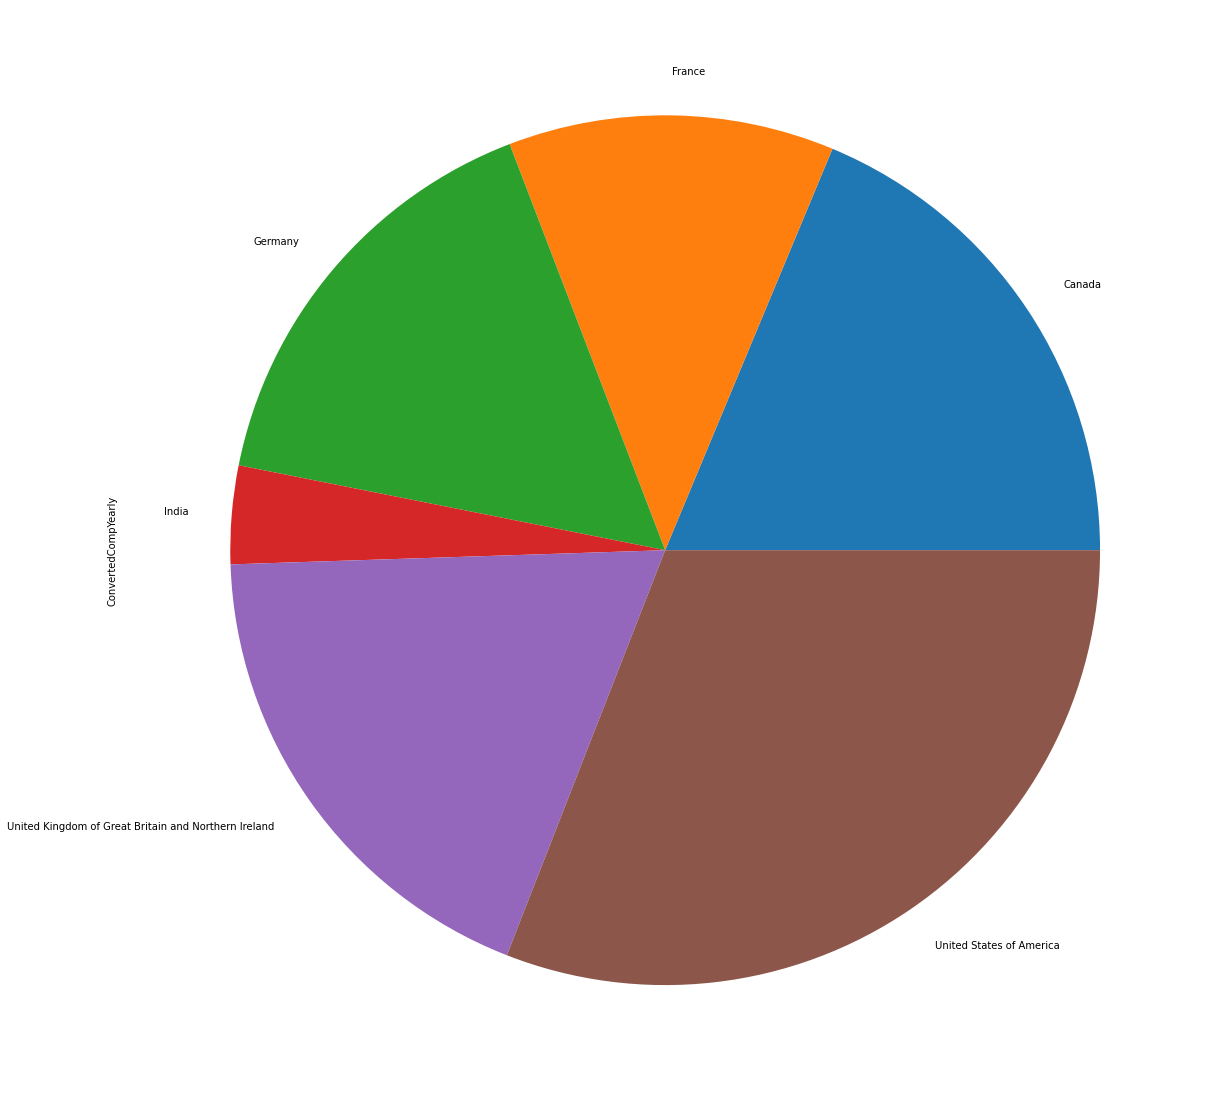

In [21]:
median_salaries = df_countries.groupby('Country')['ConvertedCompYearly'].median()
median_salaries.plot.pie(figsize=(25, 20));

**Reproduce the following plot of US developer aga in the x-axis and their salary in the y-axis**

**Using Seaborn**

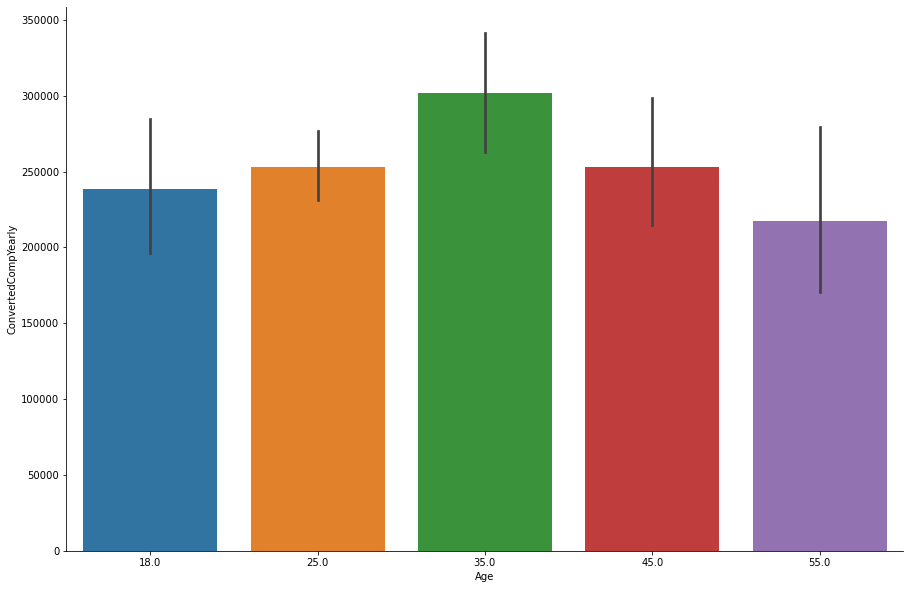

In [22]:
plt.rcParams["figure.figsize"] = (15,10)

sns.barplot(x = 'Age', y = 'ConvertedCompYearly', data = USA_df)
sns.despine()
plt.show()

**Using Matplotlib**

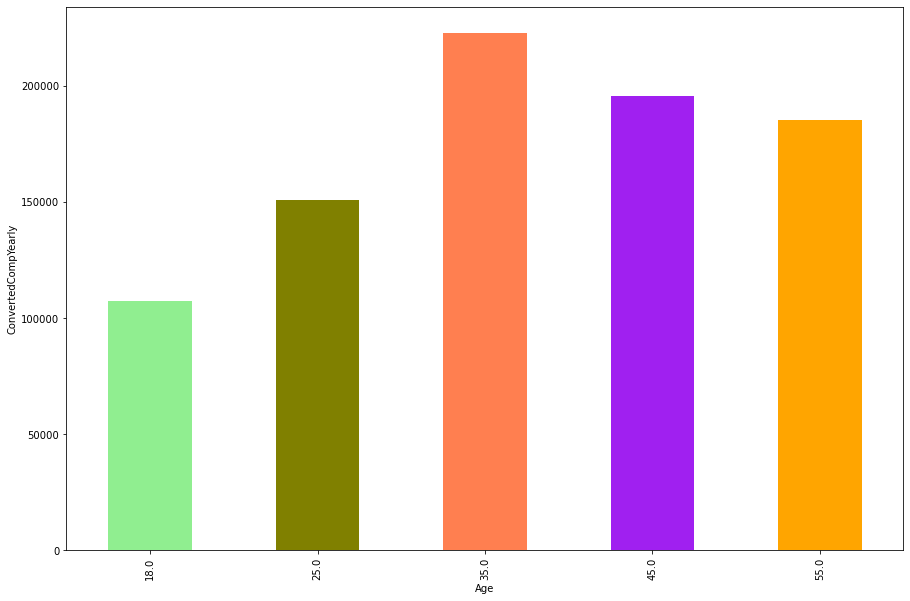

In [24]:
US_developer_AgeGroupby = df_countries.groupby('Age')['ConvertedCompYearly'].mean()
color_palette = ['#90EE90', '#808000', '#FF7F50', '#A020F0', 'orange']
plt.ylabel('ConvertedCompYearly')
US_developer_AgeGroupby.plot.bar(figsize=(15, 10), color=color_palette);

**Same thing for Zimbawe**

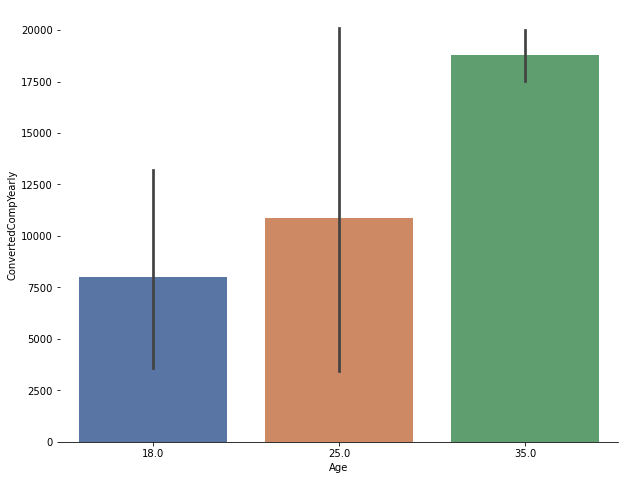

In [25]:
zimbabwe_df = df[df['Country']=='Zimbabwe']

plt.rcParams["figure.figsize"] = (10,8)
sns.barplot(x = 'Age', y = 'ConvertedCompYearly',data = zimbabwe_df,palette='deep')
sns.despine(left=True)

**Produce the following, which represent the first 20 NEWStuck in Zimbawe**

In [26]:
top_20_NEWStuck_zimbabwe = zimbabwe_df['NEWStuck'].head(20)
top_20_NEWStuck_zimbabwe

8034     Visit Stack Overflow;Google it;Watch help / tu...
13194    Visit Stack Overflow;Google it;Watch help / tu...
13273    Call a coworker or friend;Visit Stack Overflow...
13395    Visit Stack Overflow;Go for a walk or other ph...
22782               Google it;Watch help / tutorial videos
27472    Visit Stack Overflow;Google it;Watch help / tu...
29070    Visit Stack Overflow;Google it;Watch help / tu...
29692    Call a coworker or friend;Visit Stack Overflow...
31652    Visit Stack Overflow;Go for a walk or other ph...
38428    Visit Stack Overflow;Go for a walk or other ph...
39746    Visit Stack Overflow;Go for a walk or other ph...
39906    Visit Stack Overflow;Google it;Do other work a...
41503    Visit Stack Overflow;Google it;Do other work a...
44094    Call a coworker or friend;Visit Stack Overflow...
46663                                            Google it
46797    Call a coworker or friend;Visit Stack Overflow...
50221    Visit Stack Overflow;Watch help / tutorial vid.

**How many people responded to the survey?**

In [ ]:
df['Country'].value_counts()

In [ ]:
number_repondents = df['Country'].value_counts()

**How many developers use Python Worldwide?**

In [ ]:
know_python = df['LanguageHaveWorkedWith'].str.contains('Python', na=False).groupby(df['Country']).sum()
know_python

**Concatinate the number of people who reponded to the survey the one who know Python in one dataframe called python_df**

In [ ]:
python_df = pd.concat([number_repondents,know_python ],axis=1)
python_df.head()


**add a new feature called percentage**

In [ ]:
python_df['percentage'] = python_df['LanguageHaveWorkedWith'] / python_df['Country']
python_df

In [ ]:
python_df.head(5)

In [ ]:
#Rename the columns
python_df.rename(columns={'Country':'TotalRespondents', 'LanguageHaveWorkedWith':'NumbKnowsPython', 'percentage':'PercentDevKnowPython'}, inplace=True)

In [ ]:
python_df.head(50)

In [ ]:
#Surprise me with some plot off this later dataframe

**Big Cheers to the Team 'Almost DataScientist'**